# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [4]:
av_df=pd.read_csv('Cleaned_AviationData.csv', index_col=0, encoding='latin1', low_memory=False)
us_df=pd.read_csv('USState_Codes.csv', index_col=0, encoding='latin1', low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [5]:
av_df.dtypes

Accident.Number               object
Event.Date                    object
Location                      object
Country                       object
Airport.Code                  object
Airport.Name                  object
Injury.Severity               object
Aircraft.damage               object
Aircraft.Category             object
Registration.Number           object
Make                          object
Model                         object
Amateur.Built                 object
Number.of.Engines              int64
Engine.Type                   object
FAR.Description               object
Purpose.of.flight             object
Total.Fatal.Injuries           int64
Total.Serious.Injuries         int64
Total.Minor.Injuries           int64
Total.Uninjured                int64
Weather.Condition             object
Broad.phase.of.flight         object
Report.Status                 object
Publication.Date              object
Total.Passengers             float64
Fatal.Serious.Injury.Rate    float64
I

change **Total.Passangers** to numeric

In [ ]:
av_df['Total.Passengers']=pd.to_numeric(av_df['Total.Passengers'], errors='coerce')

Split into **s_planes, l_planes** based on plane > 20 makes it a larger plane

In [9]:
s_planes=av_df[av_df['Total.Passengers'] <= 20].copy()
l_planes=av_df[av_df['Total.Passengers'] > 20].copy()

In [10]:
s_planes['Aircraft.Size']="Small"
l_planes['Aricraft.Size']="Large"

In [11]:
print(s_planes.shape[0], l_planes.shape[0])

16641 248


# It Appears
that there are a **16,393** more inccidents of small planes have a accitent of some sort than large planes

In [16]:
#Getting the occurance rate for larger vs small planes
mean_injury_rates={
    'Small Aircraft': s_planes['Fatal.Serious.Injury.Rate'].mean(),
    'Large Aircraft': l_planes['Fatal.Serious.Injury.Rate'].mean()}

print("Mean rate for small planes:", s_planes['Fatal.Serious.Injury.Rate'].mean())
print("Mean rate for large planes:", l_planes['Fatal.Serious.Injury.Rate'].mean())

Mean rate for small planes: 0.26807427264384814
Mean rate for large planes: 0.07233161406198552


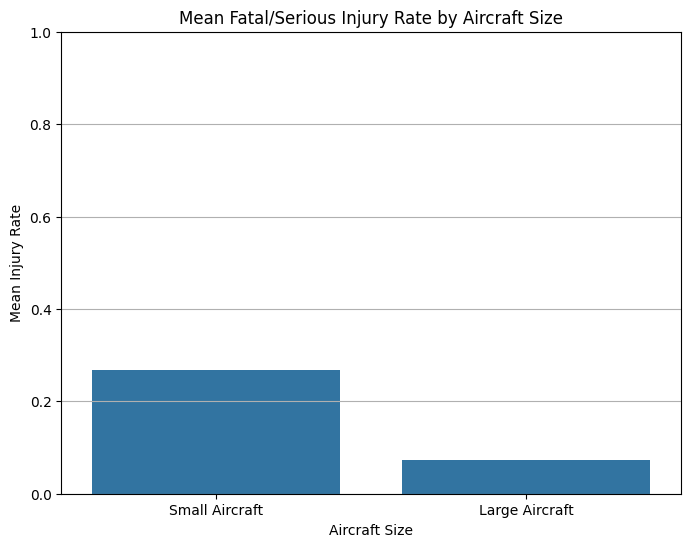

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(mean_injury_rates.keys()), y=list(mean_injury_rates.values()))

# Customize the plot
plt.title('Mean Fatal/Serious Injury Rate by Aircraft Size')
plt.xlabel('Aircraft Size')
plt.ylabel('Mean Injury Rate')
plt.ylim(0, 1)  # keep scale from 0 to 1 since it's a proportion
plt.grid(True, axis='y')

plt.show()

## Small vs Large Aircraft Injury Rate
The number of large aircraft is the dataset is only *248* opposed to small whcih has *16641*
On average large aircraft have a lower injusry rate, *meaning* passangers are less likely to be seriously injured.
Larger planes appear to be consistantly more safe, perhaps due to stricter regulations as the are owned and oporated by stricter large companies.

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.